**Qingbo Liu**

Spring 2020

CS 251: Data Analysis and Visualization

Project 2: Matrix Transformations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import data
import transformation

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

# Project 2: Matrix Transformations

The goal of this project is to give you practice using matrix multiplication to efficiently transform data (translation, scaling, and rotation). To that end, you'll develop the Transformation class as a child class of Analysis, from Project 1. 

We expect you to create the transformation matrices and and apply them from data using matrix multiplication yourself â€” **you may not call high-level functions to do all the work for you**. Functions similar to the following are fine to use:

- creating an identity matrix with `np.eye()`
- creating matrices of zeros or ones with `np.zeros()` or `np.ones()`
- concatenating matrices with `np.hstack()` or `np.vstack()`

Here is a **suggested order of implementation** for completing the Transformation class's methods in transformation.py:
1. `__init__()`: The constructor.
1. `get_data_homogeneous()`: Adds a column of normal homogeneous coordinates to the data matrix.
2. `project()`: Projects the M-dimensional Data object in self.data onto a subset of its axes.
3. Construct homogeneous transformation matrices (in any order):
> * `translation_matrix()`: Constructs an M+1-by-M+1 translation matrix for shifting the M-dimensional Data object in self.data
> * `scale_matrix()`: Constructs an M+1-by-M+1 scale matrix for resizing the M-dimensional Data object in self.data
> * `rotation_matrix_3d()`: Constructs a 4x4 rotation matrix for rotating the 3-dimensional Data object in self.data
4. Apply transformation matrices to the Data object in self.data (with homogeneous coordinates):
> * `translate()`: Uses a translation matrix to transform self.data
> * `scale()`: Uses a scale matrix to transform self.data
> * `rotate_3d()`: Uses a 3D rotation matrix to transform self.data (which must, in this case, contain exactly 3 features, plus the normal homogeneous coordinate)
> * `transform()`: Uses a homogeneous transformation matrix (passed as a parameter) to transform self.data.
5. Normalization:
> * `normalize_together()`: Uses homogeneous transformation matrices to normalize all the features of self.data together, using the global min and max.
> * `normalize_separately()`: Uses homogeneous transformation matrices to normalize each feaure separately, using its own local min and max.
6. Visualization:
> * `scatter_color()`: Similar to Analysis.scatter(), but using a third feature to control the color of the plotted data points.
> * `heatmap()`: This function is provided for you, already completed. Take a look to see what it's doing.

Use this notebook to demo your completed Transformation class (transformation.py).

## Task 0) Preprocess Iris data

- Copy over `data.py`, `analysis.py`, and `iris.csv` from Project 1.
- In whatever way you wish, replace the `species` strings with ints â€” i.e. setosa -> 0, versicolor -> 1, virginica -> 2. *Remember to change the type to numeric!*

## Task 1) Implement transformation matrices

Implement the following methods in `transformation.py`, running the following test code to guide you as you work. 
- Constructor
- `project(headers)`: "project" the data on the list of data variables specified by `headers` â€” i.e. select a subset of the variables from the original dataset.
- `get_data_homogeneous`: Helper method to get a version of the projected data array with an added homogeneous coordinate.
- `translation_matrix(headers, magnitudes)`: Make an M-dimensional homogeneous transformation matrix for translation
- `scale_matrix(headers, magnitudes)`: Make an M-dimensional homogeneous scaling matrix for scaling.
- `rotation_matrix_3d(header, degrees)`: Make an 3-D homogeneous rotation matrix for rotating the projected data about the ONE axis/variable `header`.
- `transform(C)`: Transforms the PROJECTED dataset by applying the homogeneous transformation matrix `C`.

### Test (i): Translation

- Write a test that does the following. Note the below expected output

* Create Data and Transformation objects for the Iris dataset. 
* Project the Transformation object's data onto the first 3 axes (`sepal_length`, `sepal_width`, and `petal_length`).
* Create a translation matrix that would shift the projected data by -0.5 along `sepal_length` and +1.5 along `petal_length`, then print the translation matrix. 

In [2]:
iris_data_fp = 'data/iris.csv'
iris_data = data.Data(iris_data_fp)
iris_transformation = transformation.Transformation(iris_data)

iris_transformation.project(['sepal_length', 'sepal_width', 'petal_length'])
t_m = iris_transformation.translation_matrix(['sepal_length', 'petal_length'], [-0.5, 1.5])

print(t_m)

[[ 1.   0.   0.  -0.5]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   1.   1.5]
 [ 0.   0.   0.   1. ]]


**Your output should look like:**

    Translation matrix:
    [[ 1.   0.   0.  -0.5]
     [ 0.   1.   0.   0. ]
     [ 0.   0.   1.   1.5]
     [ 0.   0.   0.   1. ]]

### Test (ii): Scaling

* Create a scaling matrix that would scale the projected data by 2 along `sepal_width` and 1/3 along `petal_length`, then print the scaling matrix.

In [3]:
s_m = iris_transformation.scale_matrix(['sepal_width', 'petal_length'], [2, 1/3])

print(s_m)

[[1.      0.      0.      0.     ]
 [0.      2.      0.      0.     ]
 [0.      0.      0.33333 0.     ]
 [0.      0.      0.      1.     ]]


**Your output should look like:**

    Scale matrix:
    [[1.      0.      0.      0.     ]
     [0.      2.      0.      0.     ]
     [0.      0.      0.33333 0.     ]
     [0.      0.      0.      1.     ]]

### Test (iii): Rotation

* Create a rotatation matrix that would rotate the Transformation object's projected data by 45 degrees about `petal_length`, and print the rotation matrix.

In [4]:
r_m = iris_transformation.rotation_matrix_3d('petal_length', 45)

print(r_m)

[[ 0.70711 -0.70711  0.       0.     ]
 [ 0.70711  0.70711  0.       0.     ]
 [ 0.       0.       1.       0.     ]
 [ 0.       0.       0.       1.     ]]


**Your output should look like:**

    Rotation matrix:
    [[ 0.70711 -0.70711  0.       0.     ]
     [ 0.70711  0.70711  0.       0.     ]
     [ 0.       0.       1.       0.     ]
     [ 0.       0.       0.       1.     ]]

### Test (iv): Perform the compound rotation-translation-scaling transformation to the projected data

- Create a compound transformation matrix in the cell below that applies the above rotation, translation, and scaling (in that order). Remember the data matrix will ultimately go on the right-hand side.
- Use the `transform` method to apply it to the projected data. Print the 1st 5 samples.

In [5]:
# Write your compound RTS transformation test here
compound_m = s_m @ t_m @ r_m
iris_data_transformed = iris_transformation.transform(compound_m)

print(compound_m)
print(f'\n{iris_data_transformed[0:5, :]}')

[[ 0.70711 -0.70711  0.      -0.5    ]
 [ 1.41421  1.41421  0.       0.     ]
 [ 0.       0.       0.33333  0.5    ]
 [ 0.       0.       0.       1.     ]]

[[ 0.63137 12.16224  0.96667  1.     ]
 [ 0.8435  11.17229  0.96667  1.     ]
 [ 0.56066 11.17229  0.93333  1.     ]
 [ 0.56066 10.88944  1.       1.     ]
 [ 0.48995 12.16224  0.96667  1.     ]]


    Compound transformation matrix:
    [[ 0.70711 -0.70711  0.      -0.5    ]
     [ 1.41421  1.41421  0.       0.     ]
     [ 0.       0.       0.33333  0.5    ]
     [ 0.       0.       0.       1.     ]]
     
    Transformed data:
    [[ 0.63137 12.16224  0.96667  1.     ]
     [ 0.8435  11.17229  0.96667  1.     ]
     [ 0.56066 11.17229  0.93333  1.     ]
     [ 0.56066 10.88944  1.       1.     ]
     [ 0.48995 12.16224  0.96667  1.     ]]

## Task 2) Transformation detective

The objective of this task is to determine the set of matrix transformations to apply to the specified data and what variables to project onto in order to reproduce the below plots.

### 2a) Hello, Iris

- Create Data and Transformation objects for the Iris dataset.
- Project the dataset onto all the headers.
- Use the Transfromation object to generate a pair plot of the entire Iris dataset. (*Your results should look just like the example, below.*)

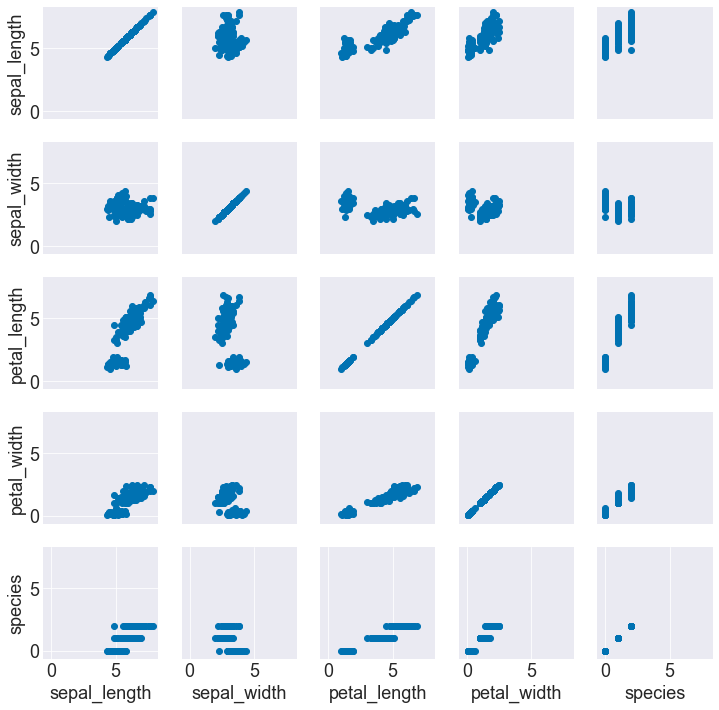

In [6]:
iris_data_fp = 'data/iris.csv'
iris_data = data.Data(iris_data_fp)
all_headers = iris_data.get_headers(return_all=True)

iris_transformation_2a = transformation.Transformation(iris_data)
iris_transformation_2a.project(all_headers)

_ = iris_transformation_2a.pair_plot(all_headers)

#### Your results should look like the image below.
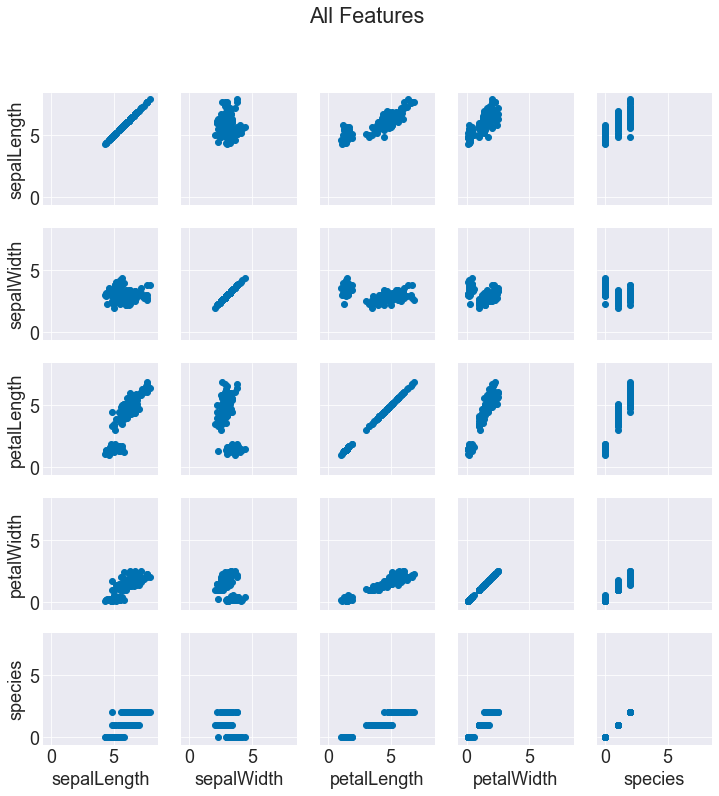

**Question 1:** How many dimensions (features) does the Iris dataset contain?

**Answer 1:** 5, four numeric and one enum (*species*, which I changed to enum because `Data` supports multiple data types)

### 2b) Solve transformation mystery 1

- Make a Transformation object.
- Determine the set of variables to project onto to recreate the image below.
- Create a pair plot identical to the one below based on the projected data.

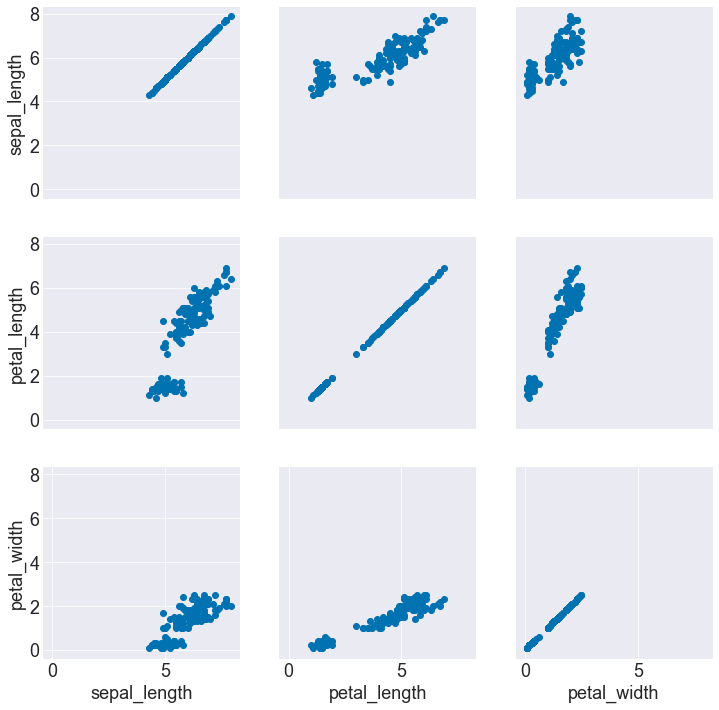

In [7]:
iris_transformation_2b = transformation.Transformation(iris_data)

project_headers_2b = ['sepal_length', 'petal_length', 'petal_width']
iris_transformation_2b.project(project_headers_2b)

_ = iris_transformation_2b.pair_plot(project_headers_2b)

#### Your results should look like the image below.
Your results should look like those below.
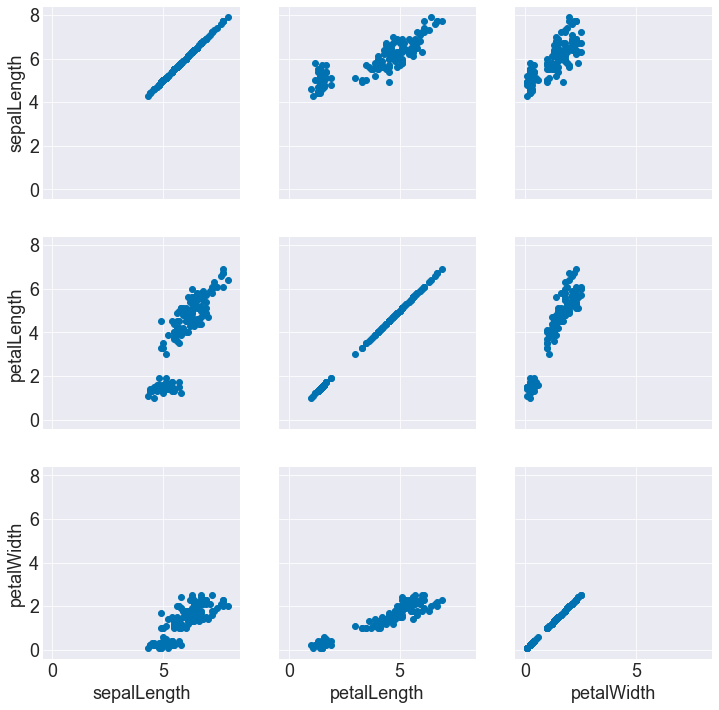

**Question 2:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 2:** No transformation is required as I found when I plotted the orignal data.

### 2c) Implement methods that apply a single transformation

Although you already have a method implemented to apply a compound transformation, it can be convenient to have dedicated methods to apply a single transformation to projected data (without having to pass around matrices). Implement the following methods for this purpose:
- `translate`: Translates the variables `headers` in projected dataset in corresponding amounts specified by `magnitudes`.
- `scale`: Scales the variables `headers` in projected dataset in corresponding amounts specified by `magnitudes`.
- `rotate_3d`: Rotates the projected data about the variable `header` by the angle (in degrees) `degrees`

#### Test `translate`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Translate x, y, and z by +1 unit each.
- Print out the 1st 5 samples of the result.

In [8]:
# Write your translate test code here
project_headers_2c = ['sepal_length', 'sepal_width', 'petal_length']
iris_transformation_2c_t = transformation.Transformation(iris_data)
iris_transformation_2c_t.project(project_headers_2c)

print(iris_transformation_2c_t.translate(project_headers_2c, [1 for _ in range(3)])[0:5, :])

[[6.1 4.5 2.4]
 [5.9 4.  2.4]
 [5.7 4.2 2.3]
 [5.6 4.1 2.5]
 [6.  4.6 2.4]]


**Your translate output should look like:**

    [[6.1 4.5 2.4]
     [5.9 4.  2.4]
     [5.7 4.2 2.3]
     [5.6 4.1 2.5]
     [6.  4.6 2.4]]

#### Test `scale`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Scale x, y, and z to 50% each.
- Print out the 1st 5 samples of the result.

In [9]:
# Write your scale test code here
iris_transformation_2c_s = transformation.Transformation(iris_data)
iris_transformation_2c_s.project(project_headers_2c)

print(iris_transformation_2c_s.scale(project_headers_2c, [0.5 for _ in range(3)])[0:5, :])

[[2.55 1.75 0.7 ]
 [2.45 1.5  0.7 ]
 [2.35 1.6  0.65]
 [2.3  1.55 0.75]
 [2.5  1.8  0.7 ]]


**Your scale output should look like:**

    [[2.55 1.75 0.7 ]
     [2.45 1.5  0.7 ]
     [2.35 1.6  0.65]
     [2.3  1.55 0.75]
     [2.5  1.8  0.7 ]]

#### Test `rotate_3d`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Rotate about `sepal_length` 10 deg.
- Print out the 1st 5 samples of the result.

In [10]:
iris_transformation_2c_r = transformation.Transformation(iris_data)
iris_transformation_2c_r.project(project_headers_2c)

print(iris_transformation_2c_r.rotate_3d('sepal_length', 10)[0:5, :])

[[5.1     3.20372 1.9865 ]
 [4.9     2.71132 1.89968]
 [4.7     2.92564 1.83592]
 [4.6     2.79243 2.01552]
 [5.      3.3022  2.00386]]


**Your rotation output should look like:**

    [[5.1     3.20372 1.9865 ]
     [4.9     2.71132 1.89968]
     [4.7     2.92564 1.83592]
     [4.6     2.79243 2.01552]
     [5.      3.3022  2.00386]]

### 2d) Solve transformation mystery 2

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto then create/apply transformation matrix (or matrices) to recreate the image below.
- Create a scatter plot identical to the one below based on the projected/transformed data.

**NOTE:** Remember that `Transformation` inherits from `Analysis` so you have access to all those methods.

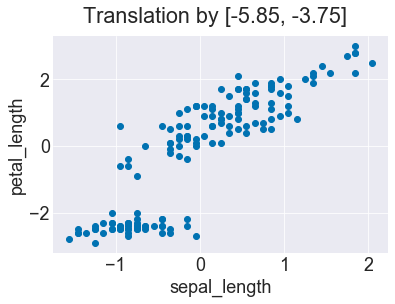

In [11]:
# Write your 2d code here
project_headers_2d = ['sepal_length', 'petal_length']
iris_transformation_2d = transformation.Transformation(iris_data)
iris_transformation_2d.project(project_headers_2d)

iris_transformation_2d.translate(project_headers_2d, [-5.85, -3.9])
_ = iris_transformation_2d.scatter('sepal_length', 'petal_length', title='Translation by [-5.85, -3.75]', fig_sz=(6, 4))

#### Your results should look like the image below.
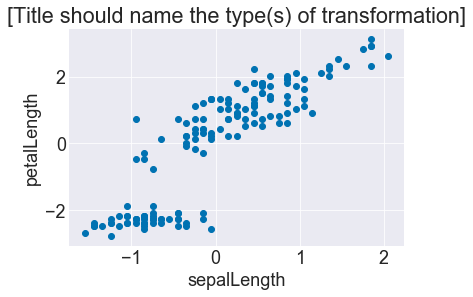

**Question 3:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 3:** The basic shape of the data does not change in transformed plot, but the cooridnates have changed. 

### 2e) Solve transformation mystery 3

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto then create/apply transformation matrix (or matrices) to recreate the image below.
- Create a scatter plot identical to the one below based on the projected/transformed data. 

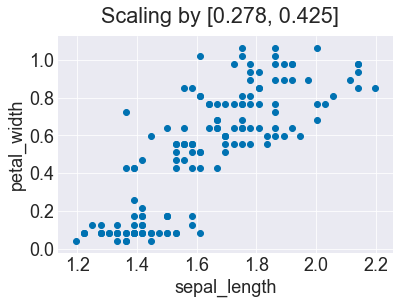

In [12]:
# Write your 2e code here
project_headers_2e = ['sepal_length', 'petal_width']
iris_transformation_2e = transformation.Transformation(iris_data)
iris_transformation_2e.project(project_headers_2e)

data_2e = iris_transformation_2e.scale(project_headers_2e, [0.278, 0.425])
_ = iris_transformation_2e.scatter('sepal_length', 'petal_width', fig_sz=(6, 4), title='Scaling by [0.278, 0.425]')

#### Your results should look like the plot below.
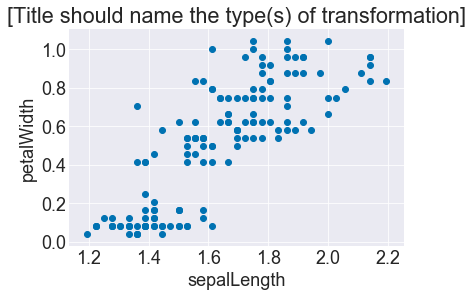

**Question 4:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 4:** The distance between points become much closer in transformed plot than the original plot. 

### 2f) Solve transformation mystery 4

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto then create/apply transformation matrix (or matrices) to recreate the image below.
- Create a pair plot identical to the one below based on the projected/transformed data. 

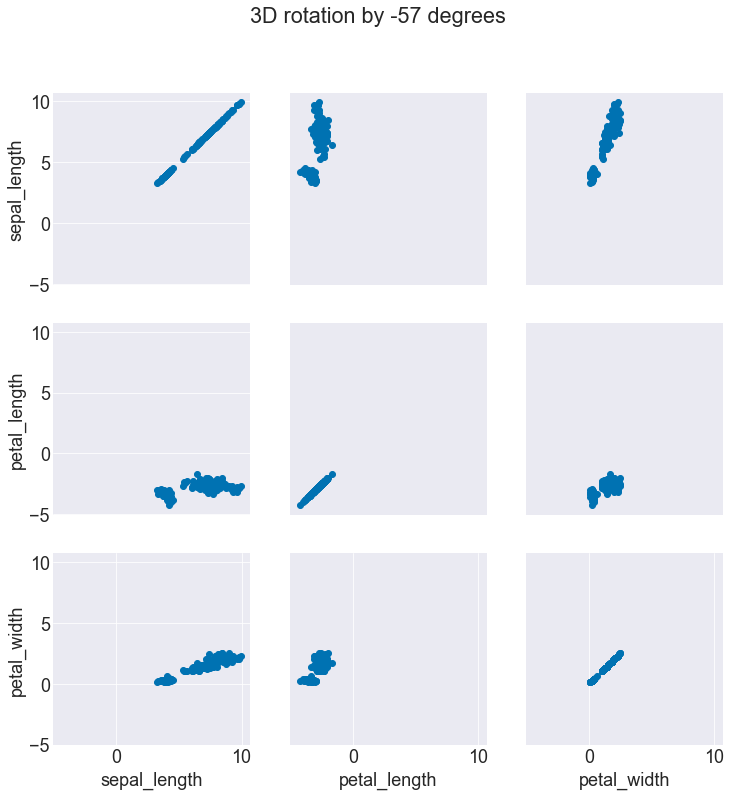

In [13]:
# Write your 2f code here
project_headers_2f = ['sepal_length', 'petal_length', 'petal_width']
iris_transformation_2f = transformation.Transformation(iris_data)
iris_transformation_2f.project(project_headers_2f)

iris_transformation_2f.rotate_3d('petal_width', -57)
_ = iris_transformation_2f.pair_plot(project_headers_2f, title='3D rotation by -57 degrees')

#### Your results should look like the image below.
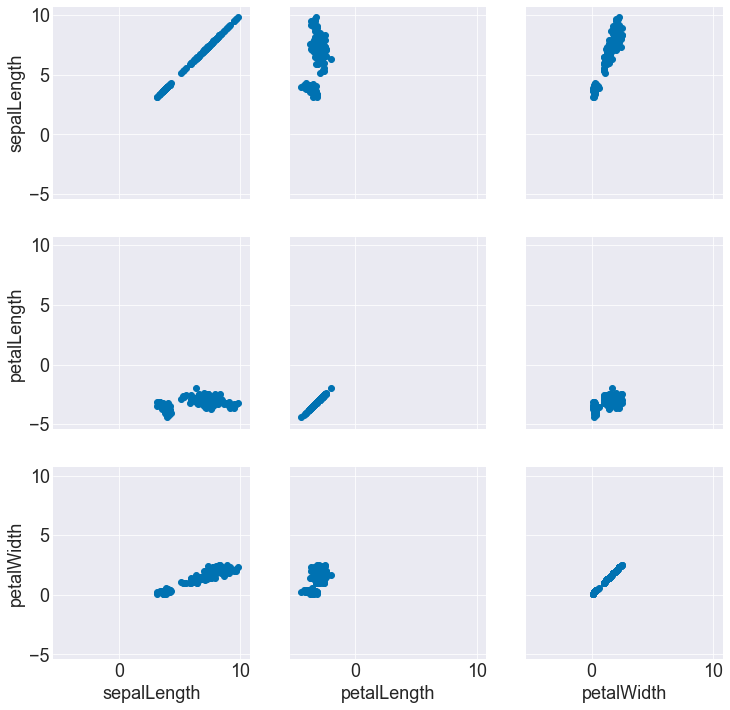

**Question 5:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 5:** The transformated plots are rotated compared to the original plots and only petal width data is not affected. 

## Task 3) Normalization

In this task, you will take advantage of your data transformation pipeline to normalize data in two ways:
1. All the variables together (entire matrix).
2. All the variables separately/independently.

Implement the following methods to perform each of these operations:
- `normalize_together`: 
- `normalize_separately`: 

### 3a ) Normalize together

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto to recreate the image below.
- Use a Transformation object to normalize each feature of the Iris dataset __together__.
- Create a pair plot identical to the one below based on the projected/transformed data. 

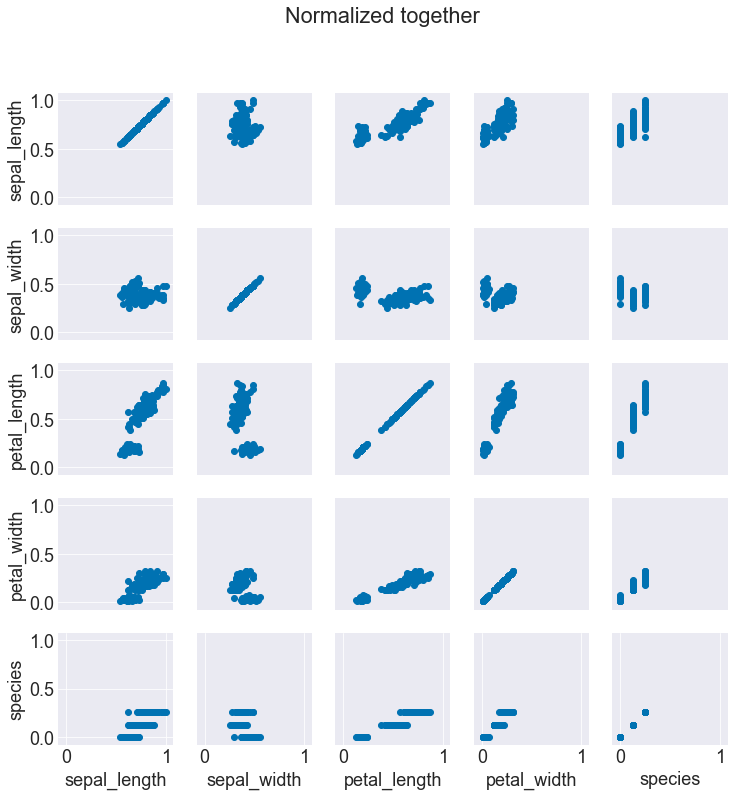

In [14]:
# Write your 3a code here
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(all_headers)

iris_trans.normalize_together()
_ = iris_trans.pair_plot(all_headers, title='Normalized Together')

#### Your results should look like the image below.
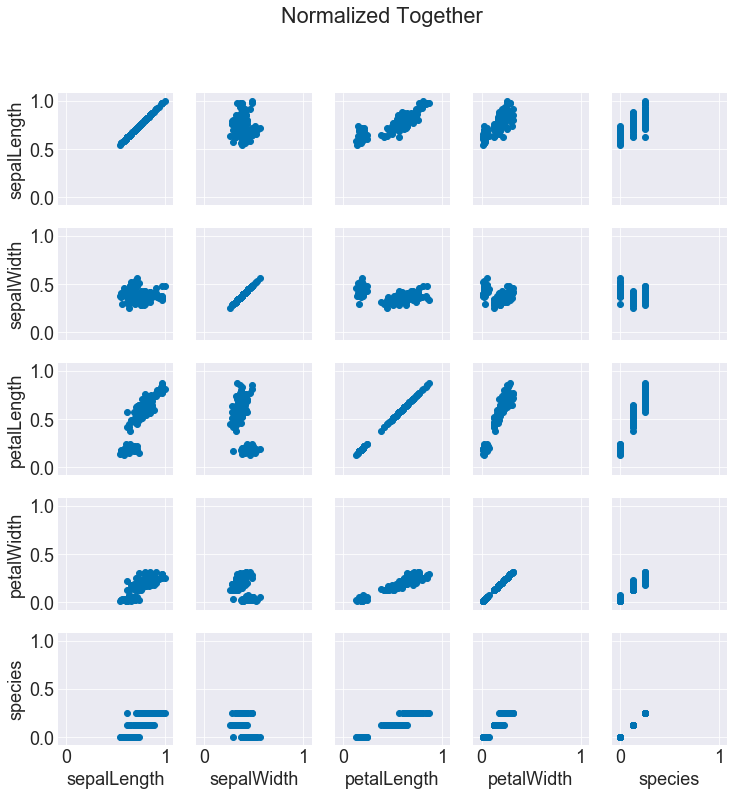

### 3b) Normalize Separately
- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto to recreate the image below.
- Use a Transformation object to normalize each feature of the Iris dataset __separately__.
- Create a pair plot identical to the one below based on the projected/transformed data. 

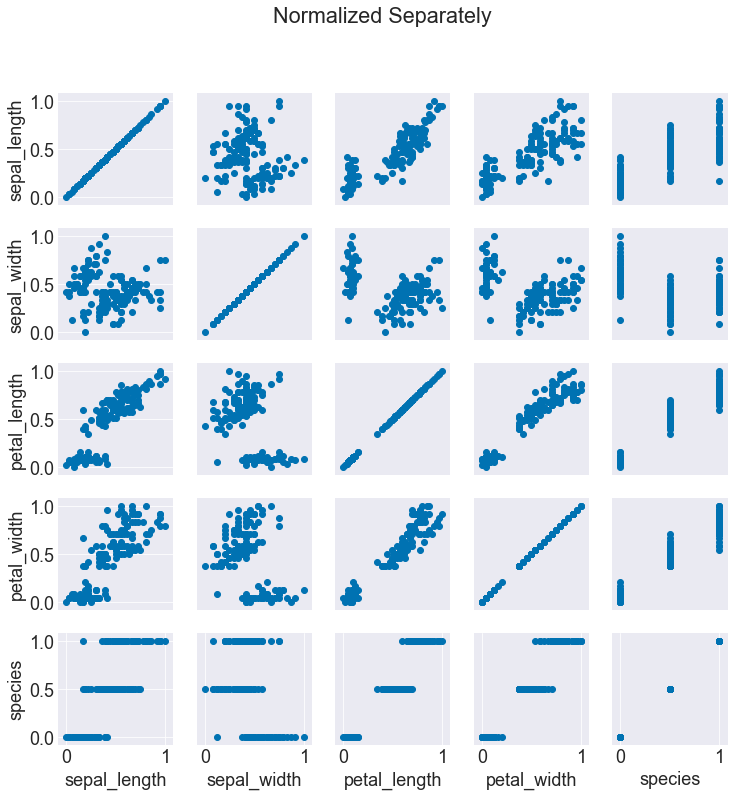

In [15]:
# Write your 3b code here
iris_transformation_3b = transformation.Transformation(iris_data)
iris_transformation_3b.project(all_headers)

iris_transformation_3b.normalize_separately()
_ = iris_transformation_3b.pair_plot(all_headers, title='Normalized Separately')

Your results should look like the image below.
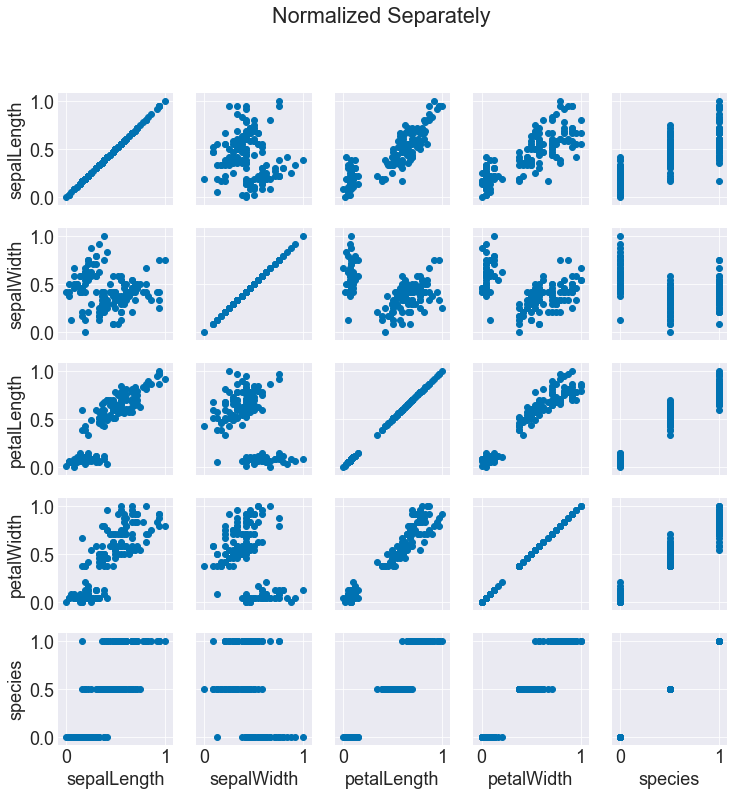

**Question 6:** What type(s) of transformation does normalization require?

**Answer 6:** Translation and scaling

### 3c) Analysis challenge

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto to recreate the image below.
- Determine the set of transformations to apply to them.
- Create a pair plot identical to the one below based on the projected/transformed data. 

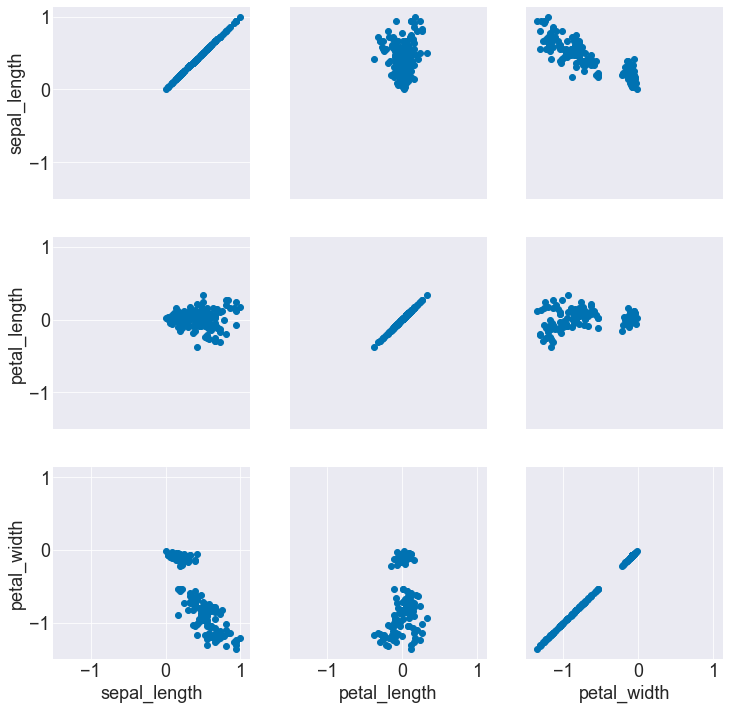

In [16]:
# Write your 3c code here
project_headers_3c = ['sepal_length', 'petal_length', 'petal_width']
iris_transformation_3c = transformation.Transformation(iris_data)
iris_transformation_3c.project(project_headers_3c)

iris_transformation_3c.normalize_separately()
iris_transformation_3c.rotate_3d('sepal_length', 45)
iris_transformation_3c.rotate_3d('petal_length', 180)
iris_transformation_3c.scale(project_headers_3c, [-1, 2, 1])

_ = iris_transformation_3c.pair_plot(project_headers_3c)

Your results should look like the image below.
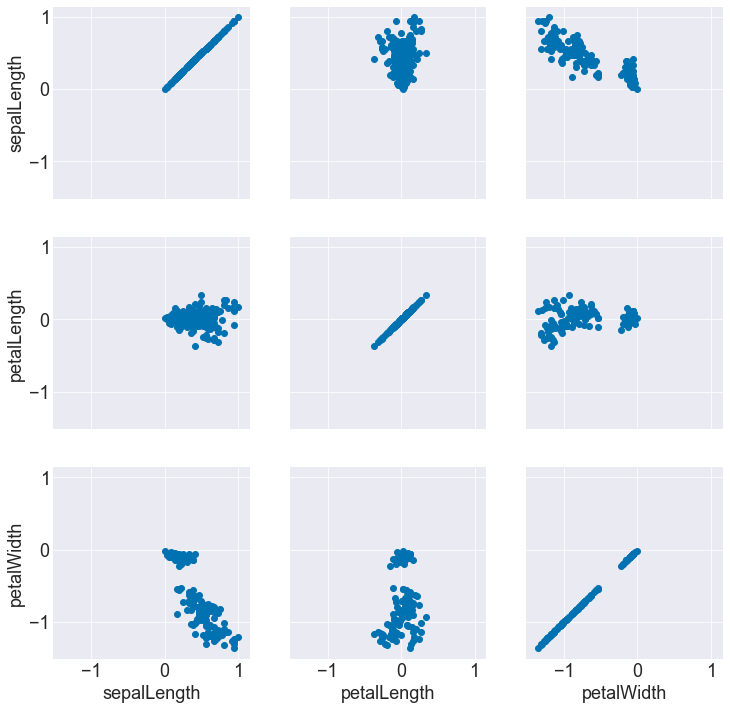

## Task 4) Visualizing multi-dimensional data (>3D)

The Iris dataset has too many dimensions to visualize in 2D space with a standard scatterplot! Let's see what we can do about that.

### 4a) Color scales

In this subtask, you will use color to visualize a third dimension of the Iris dataset. Your color scale should be colorblind friendly.

- Implement the `scatter_color()` method to your `Transformation` class that uses color to represent a third axis on a 2D scatterplot.
    - **Section B (Linear Algebra):** Use a ColorBrewer color palette to implement the color scale (e.g. from the `palettable` library).
- Use your `scatter_color()` method to recreate the images below.
    * One with headers [`sepal_length`, `petal_length`, `sepal_width`].
    * Another with headers [`sepal_length`, `petal_length`, `species`].

**Reminder:** Re-project your data onto the appropriate variables before plotting.

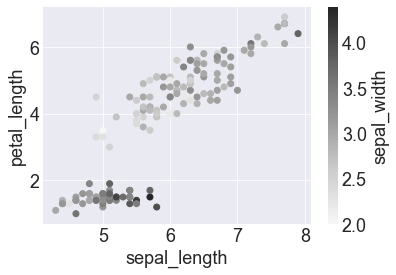

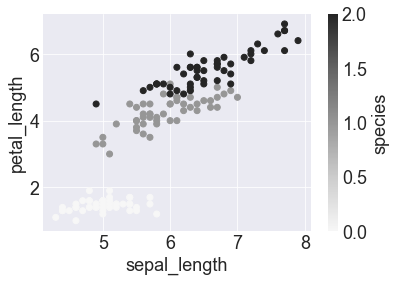

In [17]:
# Write your 4a code here
iris_transformation_4a = transformation.Transformation(iris_data)
iris_transformation_4a.project(all_headers)

iris_transformation_4a.scatter_color('sepal_length', 'petal_length', 'sepal_width')
iris_transformation_4a.scatter_color('sepal_length', 'petal_length', 'species')

#### Your results should look like the following
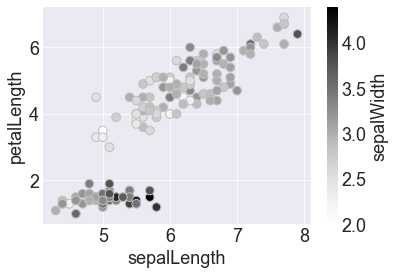
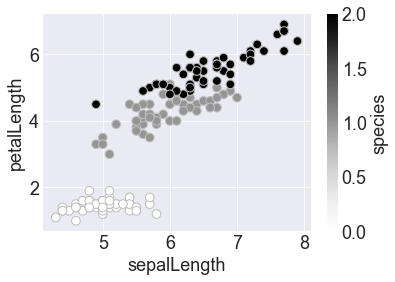

**Question 7:** In a scatterplot, is color a more useful representation of __continuous__ features (like sepal width) or __discrete__ features (like species)? Why do you think that is?

**Answer 7:** Continuous features, because colormap is a continuous range that maps bijectively continuous values to colors. Discrete features are better off being differentiated by markers than colormap. 

### 4b) Heatmap

Use the a `heatmap()` method (written for you) to recreate the image below.

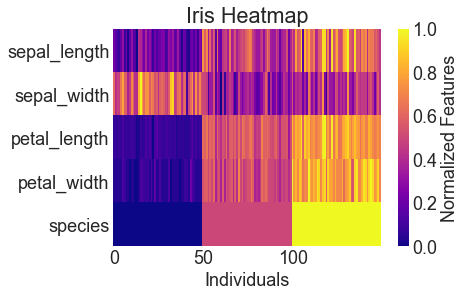

In [18]:
# Write your 4b code here
from palettable import colorbrewer 
iris_transformation_4b = transformation.Transformation(iris_data)
iris_transformation_4b.project(all_headers)

_ = iris_transformation_4b.heatmap(cmap='plasma', title='Iris Heatmap')

#### Your results should look like the image below.
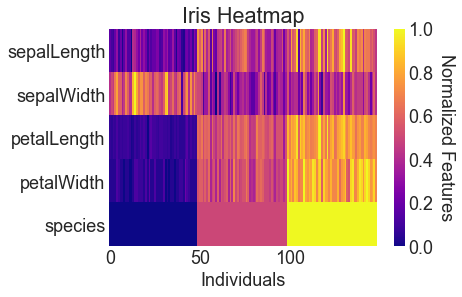

**Question 8:** Does color help you see any patterns in this heatmap that were difficult to see in the scatterplots?

**Question 9:** Are there any characteristics of iris.csv support the readability of this heatmap? Explain your answer.

**Answer 8:** All features other than species have more variantion in data. All features other than sepal width are in some way correlated to each other as all of them have low normalized values. These patterns are to find in scatterplots. 

**Answer 9:** All values in iris.csv are non-empty and are meaningful values, which render the heatmap free of noise.

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

### 1. Explore additional visualizations

- Implement a scatter plot version that uses the marker size aesthetic to visualize another dimension of data (up to 4D).
- Implement a scatter plot version that uses both color and marker size aesthetics (up to 5D).

Since in 4D case, x, y, and marker size add up to 3 dimensions so I interpret the 4th dimension as the z axis. matplotlib supports that by just adding another argument to `scatter` to plot the 4th dimension. Similarly, the 5D is implemented by using x, y, z, marker size, and color map. 

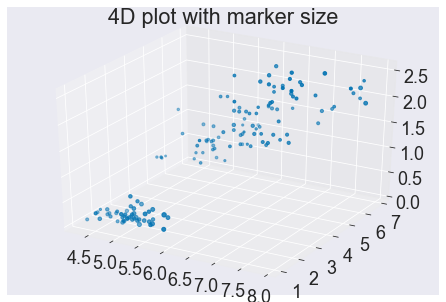

In [19]:
headers = iris_data.get_headers(True)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(headers)

iris_trans.scatter_color_3D('sepal_length', 'petal_length', 'petal_width', 
                            size_var='sepal_width', title='4D plot with marker size')

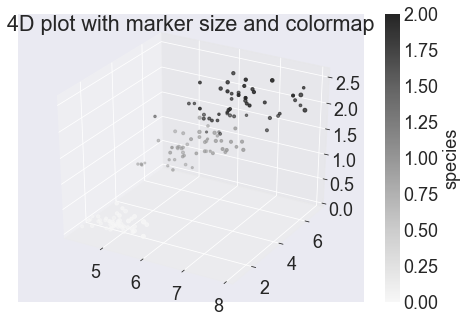

In [20]:
headers = iris_data.get_headers(True)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(headers)

iris_trans.scatter_color_3D('sepal_length', 'petal_length', 'petal_width', 
                            size_var='sepal_width', c_var='species',
                            title='4D plot with marker size and colormap')

### 2. Perform different matrix transformations on data

- Normalize by Z-score rather than min/max.
- "Whiten" a dataset.
- Implement normalize together and separately using numpy vectorization/broadcasting. Compare the approaches in efficiency (time and compare the two implementations).

__Z-score normalization:__

Z-score normalization uses $$\frac{x_i - \mu}{\sigma} $$ to normalize each data point, where $\mu$ is the mean of data and $\sigma$ is the standard deviation. The subtraction and division are done using translation and scaling, respectively. The difference between `normalize_separately_zscore` and `normalize_together_zscore` is that `normalize_together_zscore` uses global mean and standard deviation, while `normalize_separately_zscore` uses mean and standard deviation in each column. 

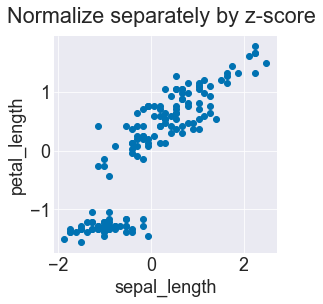

In [21]:
z_score = transformation.Transformation(iris_data)
z_score.project(['sepal_length', 'petal_length'])
z_score.normalize_separately_zscore()

_ = z_score.scatter('sepal_length', 'petal_length', title='Normalize separately by z-score')

From the figure above, titled *Normalize separately by z-score*, we can see that sepel length data has greater variance than petal length data.  

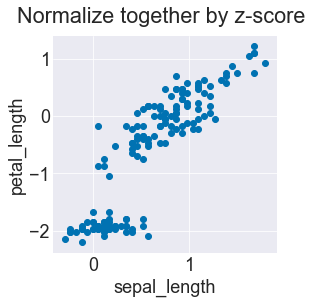

In [22]:
z_score = transformation.Transformation(iris_data)
z_score.project(['sepal_length', 'petal_length'])
z_score.normalize_together_zscore()

_ = z_score.scatter('sepal_length', 'petal_length', title='Normalize together by z-score')

__Whitenting:__

The idea of whitening is make features of the data set uncorrelated to each other and make the variance of each feature equal to 1. To do so `whiten` scales each feasure by 1/std. 

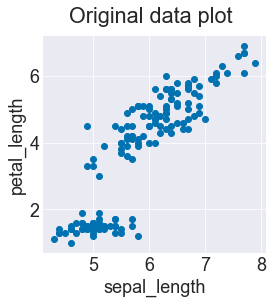

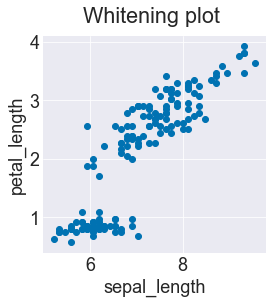

In [23]:
whitening = transformation.Transformation(iris_data)
whitening.project(['sepal_length', 'petal_length'])

whitening.scatter('sepal_length', 'petal_length', title='Original data plot')
whitening.whiten()

_ = whitening.scatter('sepal_length', 'petal_length', title='Whitening plot')

__Efficiency:__

To compare the efficiency using matrix and vectorization/broadcasting, I used git to manage different implementations and present the results in the table below. 


| operations  | normalize together  | normalize separately |
|---|---|---|
| matrix scaling/translation  | $196\mu s \pm 3.82\mu s$  | $208\mu s \pm 3.95 \mu s$  |
|  vectorization/broadcasting | $71.6 \mu s \pm 1.23 \mu s$ | $131\mu s \pm 2.04\mu s$  |

As the table shows, vectorizaiton/broadcasting is more efficient than translation/scaling and so I changed the implementions of z-score normalization to use vectorizaiton/broadcasting as well. 

### 3. Implement and use 2D rotation

Similar the methods for 3D rotations, I created `rotation_matrix_2d` and `rotate_2d`. `rotation_matrix_2d` returns a 3x3 homogeneous coordiante matrix which is essentially a 3D rotation matrix around z-axis and `rotate_2d` uses the matrix to update `self.data`. Below is a demonstration of the methods.

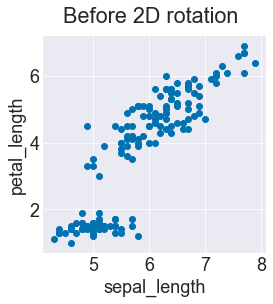

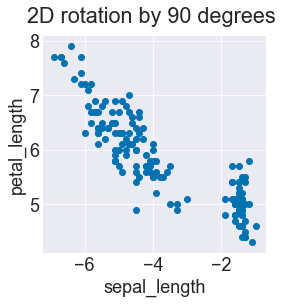

In [24]:
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(['sepal_length', 'petal_length'])

_ = iris_trans.scatter('sepal_length', 'petal_length', title='Before 2D rotation')

iris_trans.rotate_2d(90)
_ = iris_trans.scatter('sepal_length', 'petal_length', title='2D rotation by 90 degrees')

### 4. Apply matrix transformations and visualization a dataset of your choice

I analyzed Airbnb dataset for New York City in 2019.

In [25]:
airbnb_fp = 'data/AB_NYC_2019.csv'
airbnb_data = data.Data(airbnb_fp)
airbnb_trans = transformation.Transformation(airbnb_data)

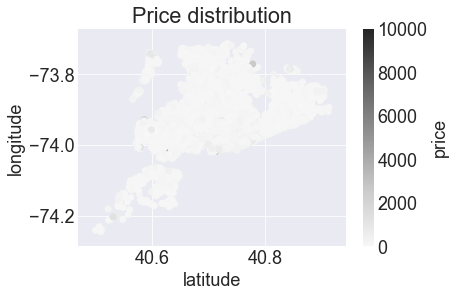

In [26]:
project_headers = ['latitude', 'longitude', 'price']
airbnb_trans.project(project_headers)

# airbnb_trans.normalize_separately()

airbnb_trans.scatter_color('latitude', 'longitude', 'price', title='Price distribution')

From the figure above, *Price distribution*, it is clear that most airbnb houses are relatively cheap, compared with the few that are priced absurdly $\$$10000. Such houses can be reasonaly be labeled as outliers as their prices are far beyond other houses'. In the figure below, we remove houses whose prices are above $\$$1000. I used a function called `filter` which I will introduce below.

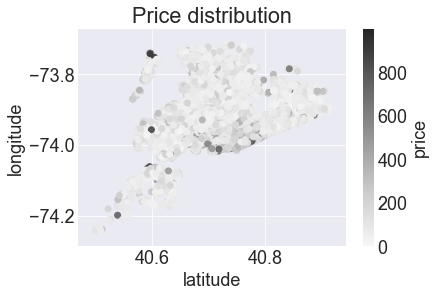

In [27]:
_ = airbnb_trans.filter('price', lambda x: x<1000)
airbnb_trans.scatter_color('latitude', 'longitude', 'price', title='Price distribution')

After filtering, the plot now contains much more information than beofre. The plot shows that the majority of Airbnb houses are cheap, the primary reason that people prefer Airbnb over hotels. However, it is also interesting to notice that there are some almost black dots in the picture, meaning their costs approach $\$$1000, which is a little bit high. 

One thing to notice is that in the figure, the longitudes are negative, but since New York are in the North hemisphere of the earth, the values are probably wrong: there should not be minus sign in front of the values. Assuming the previous plot is inverted, we apply rotation by 180 degress to invert the plot and the resulting plot looks more like New York on the map.

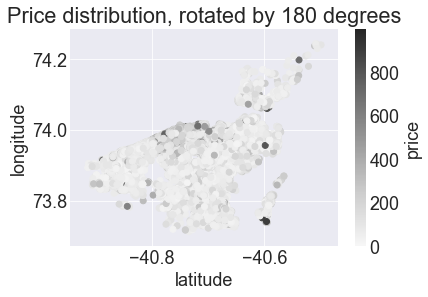

In [28]:
airbnb_trans.rotate_3d('price', 180)
airbnb_trans.scatter_color('latitude', 'longitude', 'price', title='Price distribution, rotated by 180 degrees')

We can also try to normalize each feature separately, though not much information is revealed.  

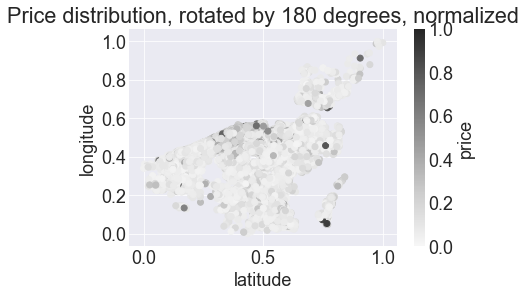

In [29]:
airbnb_trans.normalize_separately()
airbnb_trans.scatter_color('latitude', 'longitude', 'price', 
                           title='Price distribution, rotated by 180 degrees, normalized')

### 5. Add functionality to Transformation class 

Besides functions required for the task, I also implemented a function called `filter` which takes in a header of a variable that users want to filter and a condition based on which the filter is implemented. The condition is a function that users pass in, usually written as a lambda function.